<a href="https://colab.research.google.com/github/borotispilo/Ai-homework/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ᲞᲠᲐᲥᲢᲘᲙᲣᲚᲘ ᲓᲐᲕᲐᲚᲔᲑᲐ #1**
---

## **ვადა (deadline): 4 ნოემბერი 19:00**

---

თითოეული დავალება ფასდება შესაბამისი ქულით, რაც ჯამში შეადგენს **5 ქულას**

---


# **ამოცანა 1: ფეხბურთის მატჩის ბილეთების ფასწარმოქმნა**

---

## **პრობლემის აღწერა**

საფეხბურთო კლუბი აწყობს მატჩებს ეროვნულ სტადიონზე და ყიდის ბილეთებს ონლაინ პლატფორმაზე. კლუბის მენეჯმენტს სურს, გაიგოს, რა ფაქტორები ახდენენ გავლენას ბილეთის ოპტიმალურ ფასზე სხვადასხვა მატჩისთვის. მონაცემები შეიცავს ინფორმაციას გუნდების რეიტინგის, მატჩის მნიშვნელობის, სტადიონის დატვირთულობის, მარკეტინგული ბიუჯეტისა და ფასების შესახებ.

## **ამოცანის მიზანი**

ავაგოთ მოდელი, რომელიც შეგვაძლებინებს დავაპროგნოზოთ ბილეთის ოპტიმალური ფასი სხვადასხვა ფაქტორის გათვალისწინებით. ეს მოდელი დაეხმარება კლუბს უკეთ დაგეგმოს ფასწარმოქმნის სტრატეგია, გაზარდოს მოთხოვნა და მაქსიმიზაცია გაუკეთოს შემოსავალს.

---

## **მონაცემები:**
- [**match_ticket_pricing.csv**](https://drive.google.com/file/d/1y5vt2ZKymIoKqWSJ1C9mZH3OGqePTx1t/view?usp=drive_link) - მატჩების ბილეთების ფასწარმოქმნის მონაცემები

| **ველის სახელი** | **აღწერა** |
|-------------------|-------------|
| `Team_Rating` | საკუთარი გუნდის რეიტინგი (1-100 შკალაზე) |
| `Opponent_Rating` | მოწინააღმდეგე გუნდის რეიტინგი (1-100 შკალაზე) |
| `Match_Importance` | მატჩის მნიშვნელოვნების ქულა: 1=ამხანაგური, 5=ლიგა, 10=თასის ფინალი |
| `Marketing_Budget` | მატჩის მარკეტინგული ბიუჯეტი (ათას ლარებში) |
| `Stadium_Capacity_Used` | სტადიონის დატვირთულობის პროცენტი (წინა მსგავსი მატჩებიდან, %) |
| `Historical_Demand` | ისტორიული მოთხოვნის ინდექსი წინა სეზონიდან (1-100 შკალაზე) |
| `Ticket_Price` | ბილეთის საბოლოო საშუალო ფასი (ლარებში) |

---

## **მეთოდი:** წრფივი რეგრესია

---



ცარიელი მნიშვნელობები:
Team_Rating              0
Opponent_Rating          0
Match_Importance         0
Marketing_Budget         0
Stadium_Capacity_Used    0
Historical_Demand        0
Ticket_Price             0
dtype: int64

კორელაცია ბილეთის ფასთან:
Ticket_Price             1.000000
Match_Importance         0.447585
Historical_Demand        0.416913
Team_Rating              0.341062
Opponent_Rating          0.327729
Marketing_Budget         0.235070
Stadium_Capacity_Used    0.159659
Name: Ticket_Price, dtype: float64

ბიზნეს-ინსაითები EDA-დან:

ბილეთის ფასთან ყველაზე კორელირებული 3 ფაქტორი:
  1. Match_Importance: 0.448
  2. Historical_Demand: 0.417
  3. Team_Rating: 0.341


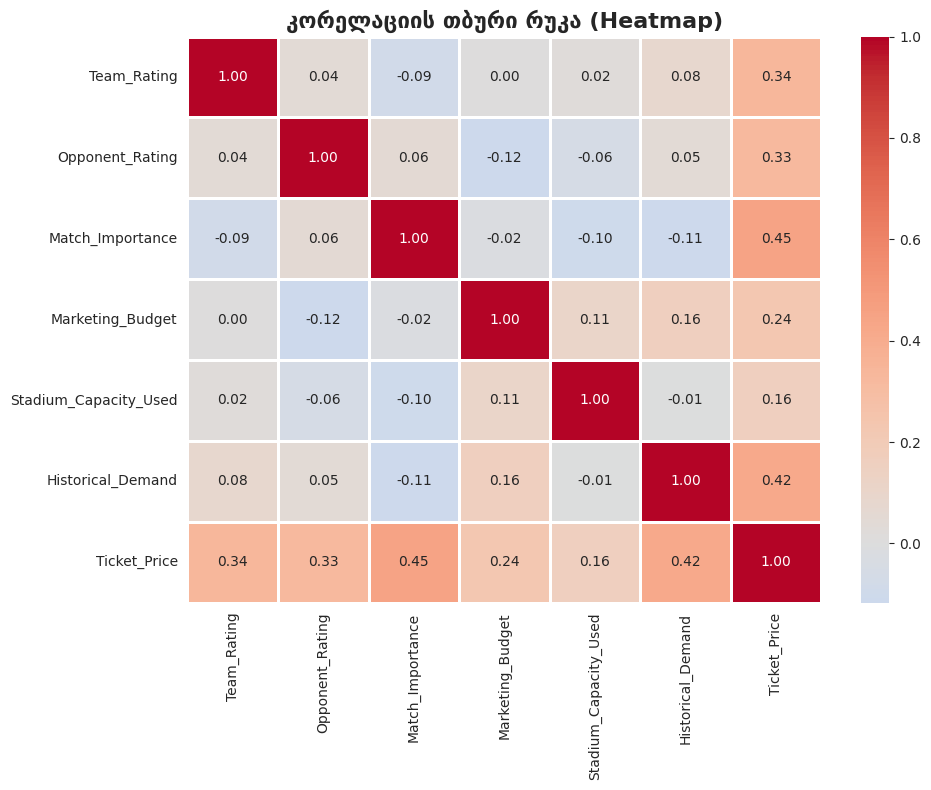

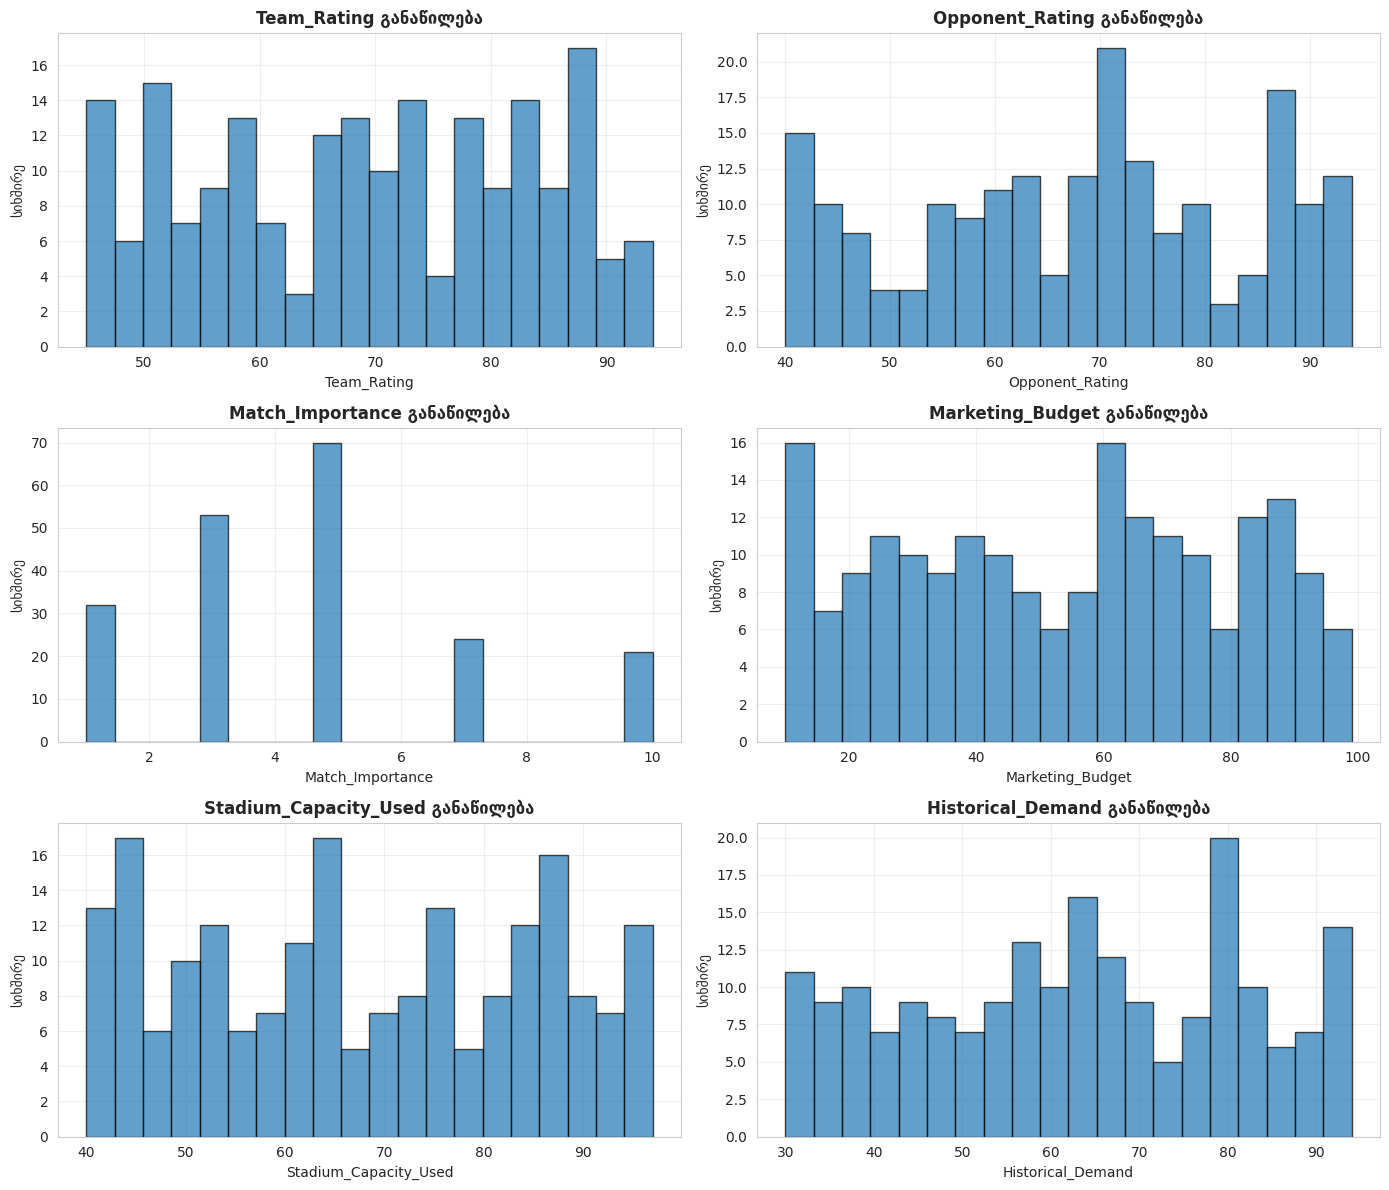

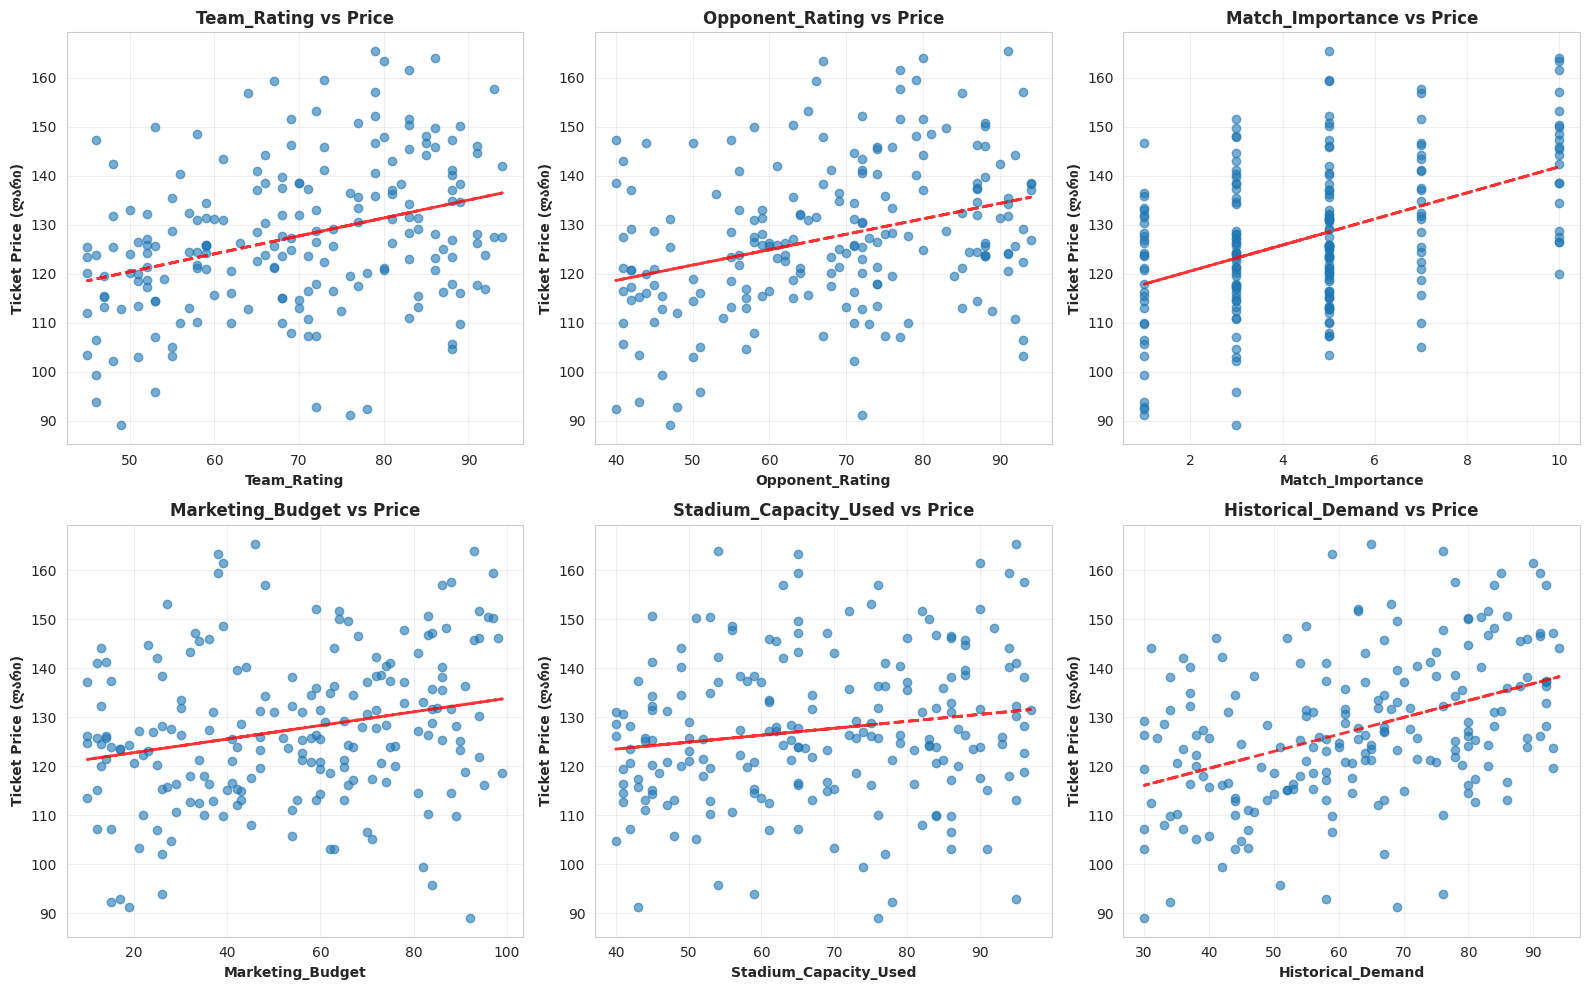

In [5]:
#@title ## **მონაცემების ჩატვირთვა და შესწავლა: გაუშვით კოდი და შეისწავლეთ შედეგები**

# match_ticket_pricing.csv ფაილი ატვირთეთ კოლაბის რანთაიმში

# გაუშვით მოცემული კოდი

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ვიზუალიზაციის სტილი
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# მონაცემების მოკვლევითი ანალიზი - Exploratory Data Analysis (EDA)

df = pd.read_csv('match_ticket_pricing.csv')

# ცარიელი მნიშვნელობების შემოწმება
print("ცარიელი მნიშვნელობები:")
print(df.isnull().sum())

# კორელაციის მატრიცა
print("\nკორელაცია ბილეთის ფასთან:")
correlations = df.corr()['Ticket_Price'].sort_values(ascending=False)
print(correlations)

# კორელაციის თბური რუკა
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1)
plt.title('კორელაციის თბური რუკა (Heatmap)', fontsize=16, fontweight='bold')
plt.tight_layout()

# ცვლადების განაწილება
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
features = ['Team_Rating', 'Opponent_Rating', 'Match_Importance',
            'Marketing_Budget', 'Stadium_Capacity_Used', 'Historical_Demand']

for idx, feature in enumerate(features):
    row, col = idx // 2, idx % 2
    axes[row, col].hist(df[feature], bins=20, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{feature} განაწილება', fontweight='bold')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('სიხშირე')
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()

# გაბნეულობის დიაგრამა (Scatter Plots) - ფასთან დამოკიდებულება
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
features = ['Team_Rating', 'Opponent_Rating', 'Match_Importance',
            'Marketing_Budget', 'Stadium_Capacity_Used', 'Historical_Demand']

for idx, feature in enumerate(features):
    row, col = idx // 3, idx % 3
    axes[row, col].scatter(df[feature], df['Ticket_Price'], alpha=0.6)
    axes[row, col].set_xlabel(feature, fontweight='bold')
    axes[row, col].set_ylabel('Ticket Price (ლარი)', fontweight='bold')
    axes[row, col].set_title(f'{feature} vs Price', fontweight='bold')
    axes[row, col].grid(alpha=0.3)

    # ტრენდის ხაზი
    z = np.polyfit(df[feature], df['Ticket_Price'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()


# ბიზნეს-ინსაითები EDA-დან
print("\n" + "="*70)
print("ბიზნეს-ინსაითები EDA-დან:")
print("="*70)

top_3_features = correlations[1:4]  # გამოვრიცხოთ Ticket_Price თავის თავთან
print("\nბილეთის ფასთან ყველაზე კორელირებული 3 ფაქტორი:")
for i, (feature, corr) in enumerate(top_3_features.items(), 1):
    print(f"  {i}. {feature}: {corr:.3f}")




In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving match_ticket_pricing.csv to match_ticket_pricing.csv
User uploaded file "match_ticket_pricing.csv" with length 4914 bytes


# **სავარჯიშო 1: მოამზადეთ მონაცემები მოდელის ასაგებად (0.5 ქულა)**
* განსაზღვრეთ სამიზნე (ასახსნელი) და ამხსნელი ცვლადები (0.2 ქულა)
* დაყავით მონაცემები საწვრთნელ (80%) და სატესტო (20%) ნაწილებად (0.2 ქულა)
* მოახდინეთ ამხსნელი ცვლადების სტანდარტიზება StandardScaler-ის გამოყენებით (0.1 ქულა)

In [6]:
# დაასრულეთ კოდი

# ამხსნელი ცვლადები და სამიზნე ცვლადი
X = df.drop('Ticket_Price', axis=1)
y = df['Ticket_Price']

# Train/Test გაყოფა (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nსაწვრთნელი მონაცემები: {len(X_train)} მატჩი")
print(f"სატესტო მონაცემები: {len(X_test)} მატჩი")

# სტანდარტიზაცია
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


საწვრთნელი მონაცემები: 160 მატჩი
სატესტო მონაცემები: 40 მატჩი


# **სავარჯიშო 2: ააგეთ და შეაფასეთ მოდელი (1 ქულა)**
   - გაწვრთენით წრფივი რეგრესიის მოდელი საწვრთნელ (train) მონაცემებზე (0.2 ქულა)
   - გააკეთეთ პროგნოზები სატესტო (test) მონაცემებზე (0.2 ქულა)
   - გამოთვალეთ: MAE, MSE, RMSE, R² (0.2 ქულა)
   - **ვიზუალიზება**: გააკეთეთ ნამდვილი და პროგნოზირებული ფასების შედარებითი ვიზუალიზება: Actual vs Predicted (scatter plot + regression line). გამოსახეთ ნარჩენების დიაგრამა (Residuals plot) (0.2 ქულა)
   - **ინტერპრეტაცია**: რა გულისხმობს RMSE ლარებში? მისაღებია თუ არა შეცდომა? (0.2 ქულა)


მოდელის შეფასება

საწვრთნელი სიმრავლის საზომები:
  MAE:  6.50 ლარი
  MSE:  68.84
  RMSE: 8.30 ლარი
  R²:   0.6809

სატესტო სიმრავლის საზომები:
  MAE:  6.79 ლარი
  MSE:  78.65
  RMSE: 8.87 ლარი
  R²:   0.7202

საზომების ინტერპრეტაცია:

  • R² = 0.7202 ნიშნავს, რომ მოდელი ხსნის ფასის ვარიაციის 72.02%-ს
  • RMSE = 8.87 ლარი - საშუალო შეცდომა პროგნოზებში
  • MAE = 6.79 ლარი - საშუალო აბსოლუტური შეცდომა

  შეფასება: საშუალო მოდელი!



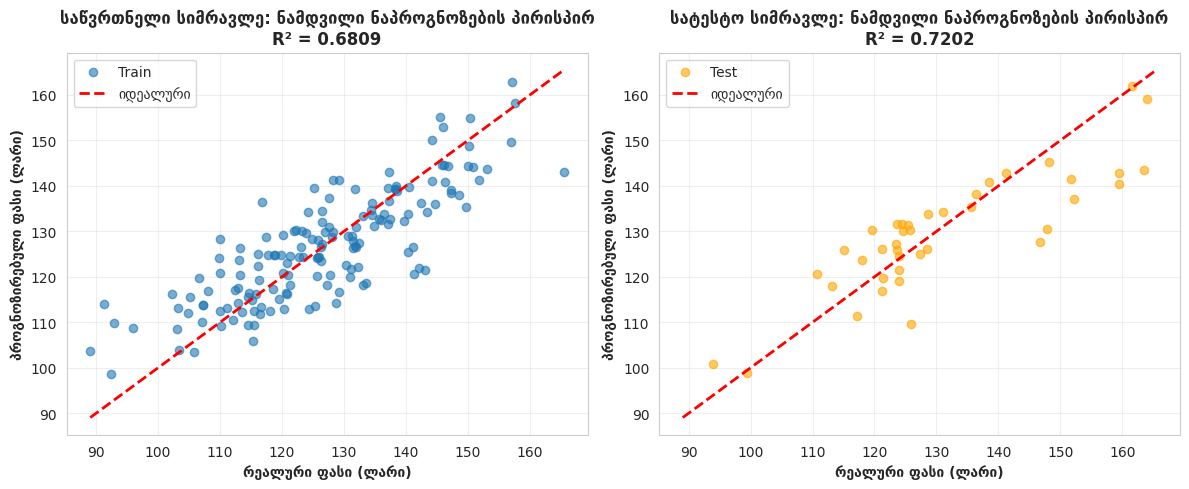

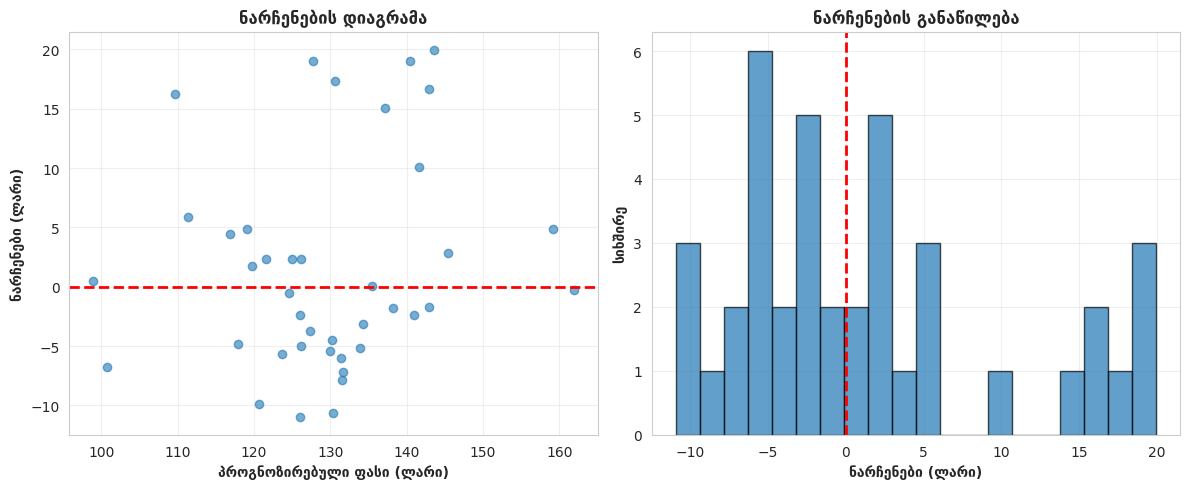

In [7]:
# დაასრულეთ კოდი

# მოდელის წვრთნა
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# პროგნოზები
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# მოდელის შეფასება
print("\n" + "="*70)
print("მოდელის შეფასება")
print("="*70)

# საზომები საწვრთნელ მონაცემებზე
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# საზომები სატესტო მონაცემებზე
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nსაწვრთნელი სიმრავლის საზომები:")
print(f"  MAE:  {train_mae:.2f} ლარი")
print(f"  MSE:  {train_mse:.2f}")
print(f"  RMSE: {train_rmse:.2f} ლარი")
print(f"  R²:   {train_r2:.4f}")

print("\nსატესტო სიმრავლის საზომები:")
print(f"  MAE:  {test_mae:.2f} ლარი")
print(f"  MSE:  {test_mse:.2f}")
print(f"  RMSE: {test_rmse:.2f} ლარი")
print(f"  R²:   {test_r2:.4f}")

# ინტერპრეტაცია
print("\n" + "="*70)
print("საზომების ინტერპრეტაცია:")
print("="*70)
print(f"""
  • R² = {test_r2 :.4f} ნიშნავს, რომ მოდელი ხსნის ფასის ვარიაციის {test_r2 *100:.2f}%-ს
  • RMSE = {test_rmse :.2f} ლარი - საშუალო შეცდომა პროგნოზებში
  • MAE = {test_mae :.2f} ლარი - საშუალო აბსოლუტური შეცდომა

  შეფასება: {'შესანიშნავი' if test_r2 > 0.9 else 'კარგი' if test_r2 > 0.8 else 'საშუალო'} მოდელი!
""")

# ნამდვილის და ნაპროგნოზების შეპირისპირება
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Train')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='იდეალური')
plt.xlabel('რეალური ფასი (ლარი)', fontweight='bold')
plt.ylabel('პროგნოზირებული ფასი (ლარი)', fontweight='bold')
plt.title(f'საწვრთნელი სიმრავლე: ნამდვილი ნაპროგნოზების პირისპირ\nR² = {train_r2 :.4f}', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='იდეალური')
plt.xlabel('რეალური ფასი (ლარი)', fontweight='bold')
plt.ylabel('პროგნოზირებული ფასი (ლარი)', fontweight='bold')
plt.title(f'სატესტო სიმრავლე: ნამდვილი ნაპროგნოზების პირისპირ\nR² = {test_r2 :.4f}', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()

# ნარჩენების დიაგრამა
residuals = y_test - y_test_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('პროგნოზირებული ფასი (ლარი)', fontweight='bold')
plt.ylabel('ნარჩენები (ლარი)', fontweight='bold')
plt.title('ნარჩენების დიაგრამა', fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('ნარჩენები (ლარი)', fontweight='bold')
plt.ylabel('სიხშირე', fontweight='bold')
plt.title('ნარჩენების განაწილება', fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(alpha=0.3)

plt.tight_layout()

# **სავარჯიშო 3: მოდელის ანალიზი და ბიზნეს-რეკომენდაციები (1 ქულა)**
   - დალაგეთ ფიჩერები მნიშვნელოვნების მიხედვით (absolute value) და გამოსახეთ (0.5 ქულა)
   - **ბიზნეს-რეკომენდაცია**: რომელ ფაქტორებზე უნდა ფოკუსირდეს კლუბის მენეჯმენტი ფასის ოპტიმიზებისთვის? (0.5 ქულა)


In [ ]:
# დაასრულეთ კოდი

# ცვლადების მნიშვნელოვნება (feature importance) და ანალიზი
print("\n" + "="*70)
print("ცვლადების მნიშვნელოვნება")
print("="*70)

# კოეფიციენტები
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nცვლადების კოეფიციენტები (მნიშვნელოვნების მიხედვით):")
print(coefficients.to_string(index=False))

print(f"\nმოდელის Intercept: {model.intercept_:.2f} ლარი")

# ვიზუალიზაცია 1: ცვლადების მნიშვნელოვნება
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coefficients['Coefficient']]
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('კოეფიციენტი', fontweight='bold')
plt.title('ცვლადების მნიშვნელოვნება (კოეფიციენტები)', fontweight='bold', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()

# ბიზნეს-ინსაითები და რეკომენდაციები
print("\n" + "="*70)
print("ბიზნეს-ინსაითები და რეკომენდაციები")
print("="*70)

print("""
ძირითადი მიგნებები:

1. ფასზე ყველაზე გავლენიანი 3 ფაქტორი:""")

for i, row in coefficients.head(3).iterrows():
    impact = "დადებითი" if row['Coefficient'] > 0 else "უარყოფითი"
    print(f"   {i+1}. {row['Feature']}: {impact} გავლენა ({row['Coefficient']:.2f})")

print(f"""

2. მოდელის ხარისხი:
   • R² = {test_r2 :.4f} - საშუალო სიზუსტის მოდელი
   • საშუალო შეცდომა: {test_rmse :.2f} ლარი

3. პრაქტიკული რეკომენდაციები კლუბისთვის:

   ფოკუსირება საჭიროა:
      - მატჩის მნიშვნელობა (Match_Importance): მნიშვნელოვანი მატჩებისთვის ფასის გაზრდა შესაძლებელია.
      - ისტორიული მოთხოვნა (Historical_Demand): მაღალი მოთხოვნის მქონე მატჩებზე ფასწარმოქმნის ოპტიმიზაცია.
      - გუნდის რეიტინგი (Team_Rating): გუნდის რეიტინგის ზრდა დადებითად აისახება ბილეთის ფასზე.

   დაბალანსებული მიდგომა:
      - მარკეტინგული ბიუჯეტი (Marketing_Budget): მარკეტინგის გაზრდას აქვს დადებითი გავლენა, თუმცა არა ისეთი ძლიერი, როგორც სხვა ფაქტორებს.
      - სტადიონის დატვირთულობა (Stadium_Capacity_Used): დატვირთულობის ზრდა მცირედით ზრდის ფასს.
""")

# **ამოცანა 2: ფეხბურთის მატჩის შედეგის პროგნოზირება**

---

## **პრობლემის აღწერა**

საფეხბურთო კლუბი მონაწილეობს ეროვნულ ლიგაში და ესაჭიროება მონაცემებზე დაფუძნებული სტრატეგიული დაგეგმვა. კლუბის ტექნიკურ შტაბს სურს, გაიგოს რა ფაქტორები განსაზღვრავენ მატჩის შედეგს (მოგებას ან წაგებას) და როგორ გაზარდოს მოგების ალბათობა. მონაცემები შეიცავს ინფორმაციას 400 მატჩის შესახებ: გუნდების რეიტინგების, სახლში/გარეთ თამაშის, ფორმის, დაზიანებების, ამინდის და სხვა ფაქტორების შესახებ.

## **ამოცანის მიზანი**

ავაგოთ მოდელი, რომელიც შეგვაძლებინებს დავაპროგნოზოთ მატჩის შედეგი (მოგება ან წაგება) სხვადასხვა ფაქტორის გათვალისწინებით. ეს მოდელი დაეხმარება კლუბს უკეთ მოამზადოს გუნდი, შეიმუშაოს ტაქტიკა, იდენტიფიცირდეს რისკ-ფაქტორები და მიიღოს Data-Driven გადაწყვეტილებები მატჩის შედეგის გასაუმჯობესებლად.

---

## **მონაცემები:**
- [**match_results.csv**](https://drive.google.com/file/d/180K0SBD_G-Xlq0nh-7svAA1TWiaC2JBM/view?usp=drive_link)- მატჩების შედეგებისა და მახასიათებლების მონაცემები

| **ველის სახელი** | **აღწერა** |
|-------------------|-------------|
| `Team_Rating` | საკუთარი გუნდის რეიტინგი (50-90 შკალაზე) |
| `Opponent_Rating` | მოწინააღმდეგე გუნდის რეიტინგი (45-90 შკალაზე) |
| `Home_Away` | მატჩის ადგილი: 0=გარეთ, 1=სახლში |
| `Recent_Form` | გუნდის ბოლო ხუთი მატჩიდან ქულები (0-15, სადაც 15=5 მოგება) |
| `Injuries` | დაზიანებული ძირითადი მოთამაშეების რაოდენობა (0-5) |
| `Rest_Days` | დასვენების დღეების რაოდენობა წინა მატჩის შემდეგ (2-14) |
| `Weather_Quality` | ამინდის ხარისხი მატჩის დღეს (1=ძალიან ცუდი, 10=შესანიშნავი) |
| `Referee_Strictness` | მსაჯის სიმკაცრის ინდექსი (1=რბილი, 10=ძალიან მკაცრი) |
| `Crowd_Size` | მაყურებლების რაოდენობა სტადიონზე (5,000-50,000) |
| `Match_Importance` | მატჩის მნიშვნელობის ქულა: 1=ამხანაგური, 3=ლიგა, 5=მნიშვნელოვანი, 7=გადამწყვეტი, 10=ფინალი |
| `Win` | მატჩის შედეგი: 0=წაგება, 1=მოგება (სამიზნე ცვლადი) |

---

## **მეთოდი:** Logistic Regression (ბინარული კლასიფიკაცია)

---



კორელაცია მოგებასთან:
Win                   1.000000
Rating_Diff           0.790408
Team_Rating           0.556707
Recent_Form           0.160331
Home_Away             0.125353
Rest_Days             0.075247
Referee_Strictness    0.005302
Match_Importance     -0.015274
Crowd_Size           -0.027497
Weather_Quality      -0.039256
Injuries             -0.104586
Opponent_Rating      -0.595935
Name: Win, dtype: float64

ძირითადი მიგნებები:
  • რეიტინგებში სხვაობა (მოგება): +17.7
  • რეიტინგებში სხვაობა (წაგება): -10.3
  • სახლში მოგება: 55.8%
  • სტუმრად მოგება: 43.2%


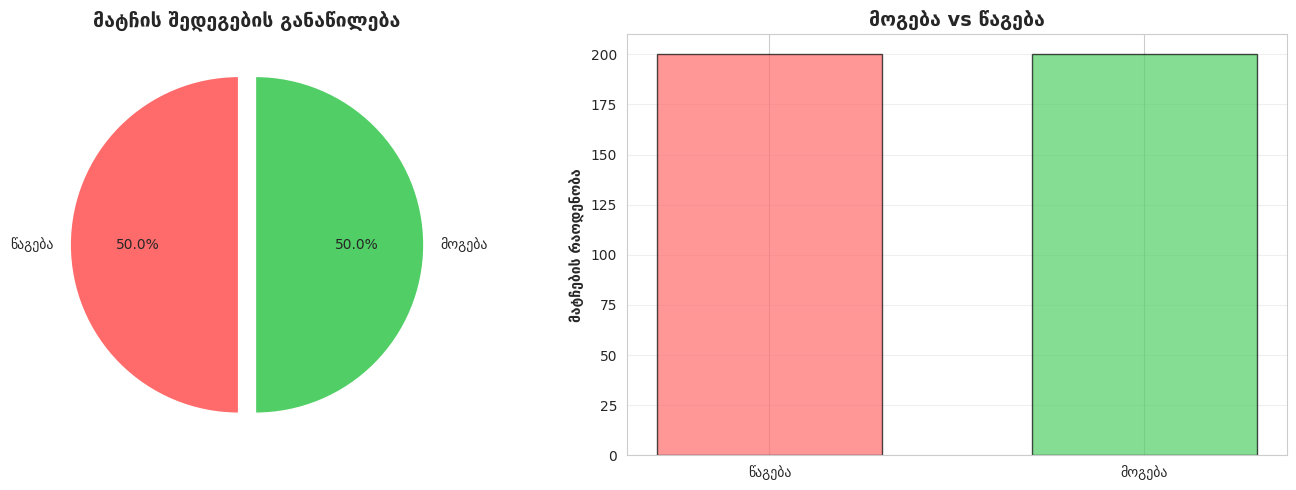

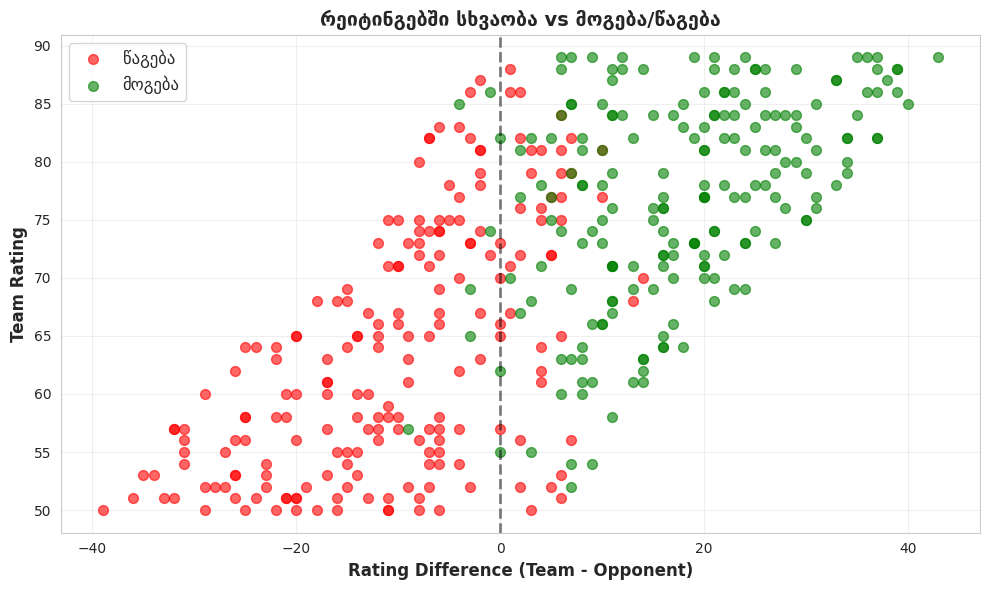

<Figure size 1000x600 with 0 Axes>

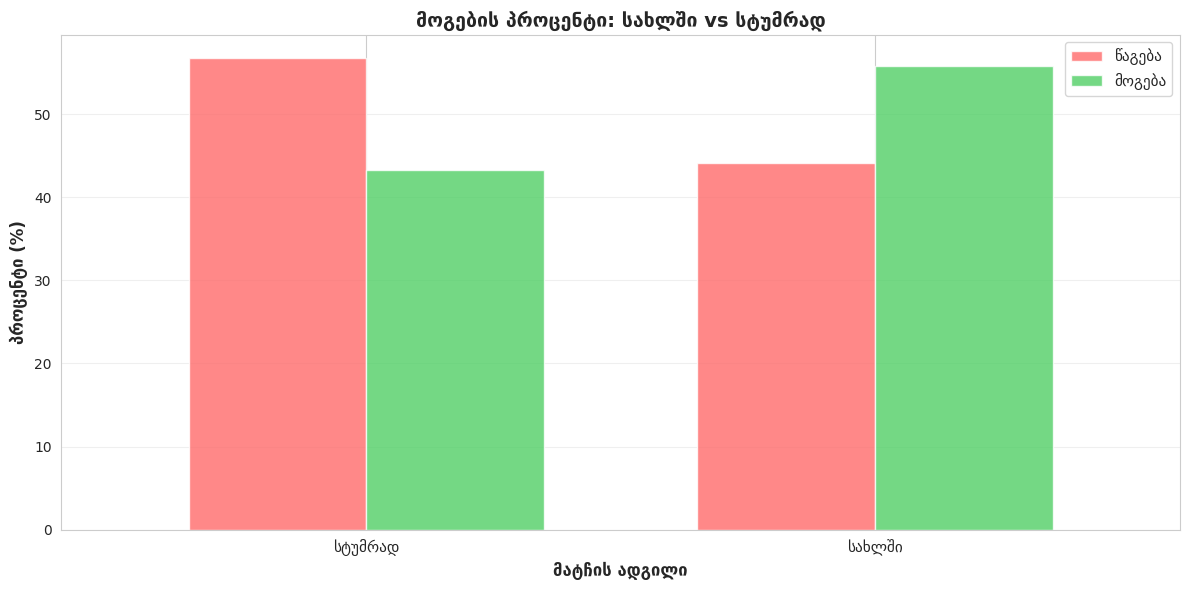

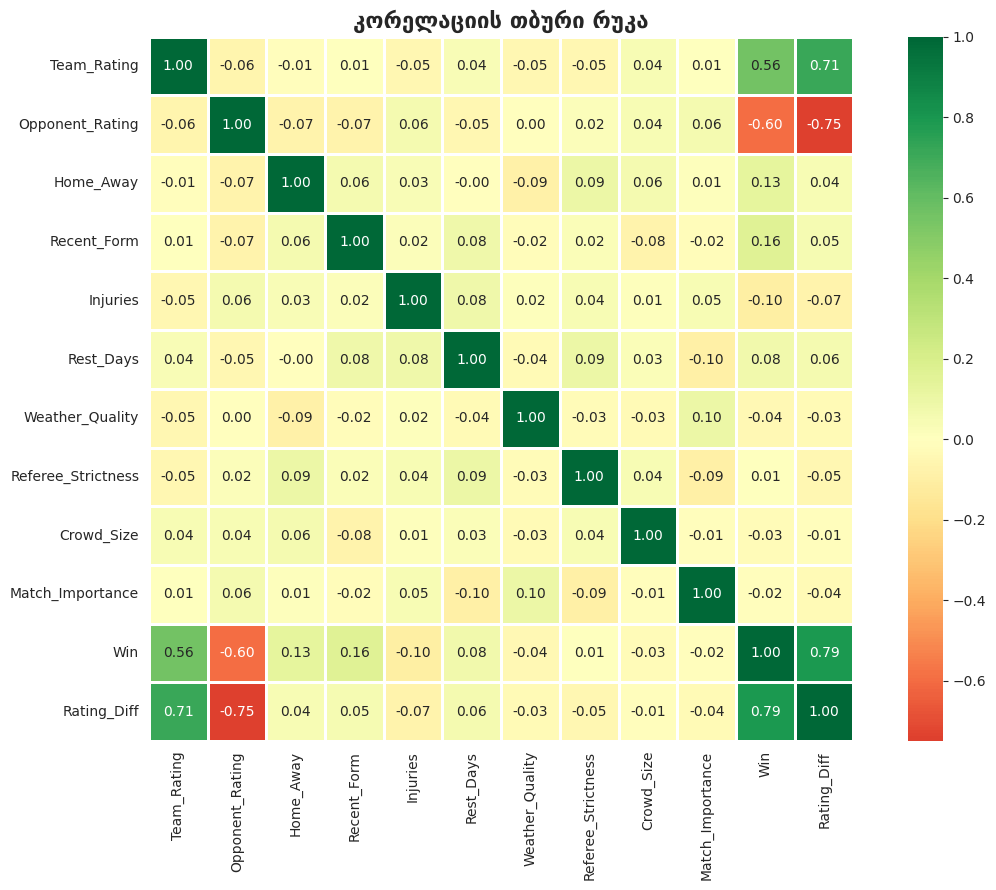

In [12]:
#@title ## **მონაცემების ჩატვირთვა და შესწავლა: გაუშვით კოდი და შეისწავლეთ შედეგები**

# match_results.csv ფაილი ატვირთეთ კოლაბის რანთაიმში

# გაუშვით მოცემული კოდი

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, precision_recall_curve)
import warnings
warnings.filterwarnings('ignore')

# ვიზუალიზაციის სტილი
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# მონაცემების ჩატვირთვა
df = pd.read_csv('match_results.csv')

# EDA - ვიზუალიზაციები

# შედეგების განაწილება
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
result_counts = df['Win'].value_counts()

axes[0].pie(result_counts, labels=['წაგება', 'მოგება'],
            autopct='%1.1f%%', colors=['#ff6b6b', '#51cf66'], startangle=90,
            explode=(0.05, 0.05))
axes[0].set_title('მატჩის შედეგების განაწილება', fontweight='bold', fontsize=14)

axes[1].bar(['წაგება', 'მოგება'], result_counts.values,
            color=['#ff6b6b', '#51cf66'], alpha=0.7, edgecolor='black', width=0.6)
axes[1].set_ylabel('მატჩების რაოდენობა', fontweight='bold')
axes[1].set_title('მოგება vs წაგება', fontweight='bold', fontsize=14)
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()


# რეიტინგებში სხვაობის შეპირისპირება მოგებასთან
df['Rating_Diff'] = df['Team_Rating'] - df['Opponent_Rating']

plt.figure(figsize=(10, 6))
plt.scatter(df[df['Win']==0]['Rating_Diff'], df[df['Win']==0]['Team_Rating'],
           alpha=0.6, c='red', label='წაგება', s=50)
plt.scatter(df[df['Win']==1]['Rating_Diff'], df[df['Win']==1]['Team_Rating'],
           alpha=0.6, c='green', label='მოგება', s=50)
plt.xlabel('Rating Difference (Team - Opponent)', fontweight='bold', fontsize=12)
plt.ylabel('Team Rating', fontweight='bold', fontsize=12)
plt.title('რეიტინგებში სხვაობა vs მოგება/წაგება', fontweight='bold', fontsize=14)
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.5)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()


# შინ და სტუმრად
home_away_results = pd.crosstab(df['Home_Away'], df['Win'], normalize='index') * 100

plt.figure(figsize=(10, 6))
home_away_results.plot(kind='bar', color=['#ff6b6b', '#51cf66'], alpha=0.8, width=0.7)
plt.xlabel('მატჩის ადგილი', fontweight='bold', fontsize=12)
plt.ylabel('პროცენტი (%)', fontweight='bold', fontsize=12)
plt.title('მოგების პროცენტი: სახლში vs სტუმრად', fontweight='bold', fontsize=14)
plt.xticks([0, 1], ['სტუმრად', 'სახლში'], rotation=0, fontsize=11)
plt.legend(['წაგება', 'მოგება'], fontsize=11)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()

# კორელაციის თბური რუკა
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0,
            fmt='.2f', linewidths=1, square=True)
plt.title('კორელაციის თბური რუკა', fontsize=16, fontweight='bold')
plt.tight_layout()


# კორელაციური ანალიზი
print("\nკორელაცია მოგებასთან:")
correlations = df.corr()['Win'].sort_values(ascending=False)
print(correlations)

# ინსაითები
print("\nძირითადი მიგნებები:")
avg_rating_diff_win = df[df['Win']==1]['Rating_Diff'].mean()
avg_rating_diff_loss = df[df['Win']==0]['Rating_Diff'].mean()
home_win_rate = (df[df['Home_Away']==1]['Win'].sum() / len(df[df['Home_Away']==1])) * 100
away_win_rate = (df[df['Home_Away']==0]['Win'].sum() / len(df[df['Home_Away']==0])) * 100

print(f"  • რეიტინგებში სხვაობა (მოგება): {avg_rating_diff_win:+.1f}")
print(f"  • რეიტინგებში სხვაობა (წაგება): {avg_rating_diff_loss:+.1f}")
print(f"  • სახლში მოგება: {home_win_rate:.1f}%")
print(f"  • სტუმრად მოგება: {away_win_rate:.1f}%")


You can't directly upload a folder using `files.upload()`. Here are two common ways to get a folder into your Colab environment:

**Method 1: Zip the folder and upload the zip file**

1.  On your local computer, compress the folder into a `.zip` file.
2.  Use the `files.upload()` code to upload the `.zip` file.
3.  Use shell commands in a code cell to unzip the file:

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving match_results.csv to match_results.csv
User uploaded file "match_results.csv" with length 11709 bytes


In [9]:
# !unzip your_folder_name.zip
# Replace 'your_folder_name.zip' with the actual name of your uploaded zip file.

**Method 2: Mount your Google Drive**

If the folder is in your Google Drive, you can mount your Drive and access the folder directly:

# **სავარჯიშო 1: მოამზადეთ მონაცემები მოდელის ასაგებად (0.5 ქულა)**
* განსაზღვრეთ სამიზნე (ასახსნელი) და ამხსნელი ცვლადები (0.2 ქულა)
* დაყავით მონაცემები საწვრთნელ (80%) და სატესტო (20%) ნაწილებად (0.2 ქულა)
* მოახდინეთ ამხსნელი ცვლადების სტანდარტიზება StandardScaler-ის გამოყენებით (0.1 ქულა)

In [13]:
# დაასრულეთ კოდი

# =====================================================================
# მონაცემების მომზადება
# =====================================================================

# ამხსნელი ცვლადები და სამიზნე ცვლადი
X = df.drop(['Win', 'Rating_Diff'], axis=1) # Exclude 'Win' (target) and 'Rating_Diff' (derived)
y = df['Win']

# Train/Test გაყოფა (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"საწვრთნელი სიმრავლე: {len(X_train)} მატჩი")
print(f"   - მოგება: {y_train.sum()} ({y_train.mean()*100:.1f}%)")
print(f"სატესტო სიმრავლე: {len(X_test)} მატჩი")
print(f"   - მოგება: {y_test.sum()} ({y_test.mean()*100:.1f}%)")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

საწვრთნელი სიმრავლე: 320 მატჩი
   - მოგება: 160 (50.0%)
სატესტო სიმრავლე: 80 მატჩი
   - მოგება: 40 (50.0%)


# **სავარჯიშო 2: ააგეთ და შეაფასეთ კლასიფიკაციის მოდელი (1 ქულა)**
   - გაწვრთენით ლოგისტიკური რეგრესიის მოდელი საწვრთნელ (train) მონაცემებზე (0.2 ქულა)
   - გააკეთეთ პროგნოზები სატესტო (test) მონაცემებზე (0.2 ქულა)
   - გამოთვალეთ: სისწორე (Accuracy), სიზუსტე (Precision), მგრძნობელობა (Recall), F1-ქულა (F1-Score), ROC-AUC (0.2 ქულა)
   - **ვიზუალიზება**: ვიზუალურად გამოსახეთ აღრევის მატრიცა (Confusion Matrix) და ROC მრუდი (0.2 ქულა)
   - **ინტერპრეტაცია**: რას ნიშნავს თითოეული საზომი ჩვენი საფეხბურთო მონაცემების კონტექსტში? (0.2 ქულა)


მოდელის შეფასება

საზომები სატესტო სიმრავლეზე:
  სისწორე (Accuracy):  0.9500 (95.00%)
  სიზუსტე (Precision): 0.9737 (97.37%)
  მგრძნობელობა (Recall):    0.9250 (92.50%)
  F1-ქულა (F1-Score):  0.9487
  ROC-AUC:   0.9956

----------------------------------------------------------------------
კლასიფიკაციის რეპორტი:
              precision    recall  f1-score   support

      წაგება       0.93      0.97      0.95        40
      მოგება       0.97      0.93      0.95        40

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



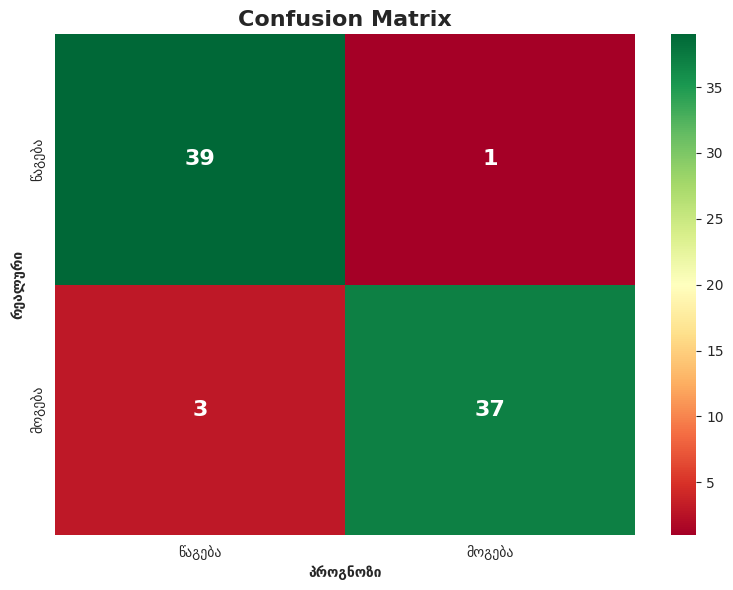

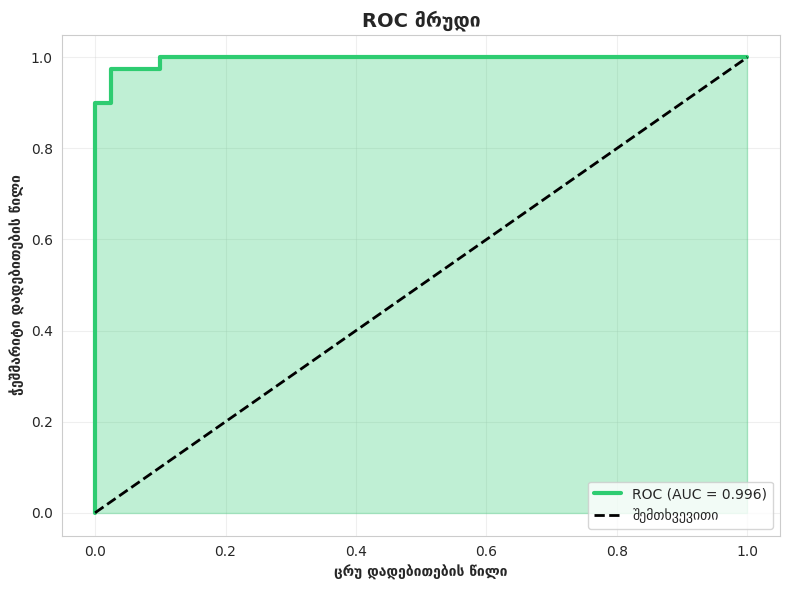

In [14]:
# დაასრულეთ კოდი

# მოდელის წვრთნა
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# პროგნოზები
y_test_pred = model.predict(X_test_scaled)
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

# მოდელის შეფასება
print("\n" + "="*70)
print("მოდელის შეფასება")
print("="*70)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)


print(f"\nსაზომები სატესტო სიმრავლეზე:")
print(f"  სისწორე (Accuracy):  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  სიზუსტე (Precision): {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"  მგრძნობელობა (Recall):    {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"  F1-ქულა (F1-Score):  {test_f1:.4f}")
print(f"  ROC-AUC:   {test_auc:.4f}")

print("\n" + "-"*70)
print("კლასიფიკაციის რეპორტი:")
print(classification_report(y_test, y_test_pred, target_names=['წაგება', 'მოგება']))

# აღრევის მატრიცა (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', cbar=True,
            xticklabels=['წაგება', 'მოგება'], yticklabels=['წაგება', 'მოგება'],
            annot_kws={'size': 16, 'weight': 'bold'})
plt.title('Confusion Matrix', fontweight='bold', fontsize=16)
plt.ylabel('რეალური', fontweight='bold')
plt.xlabel('პროგნოზი', fontweight='bold')
plt.tight_layout()


# ROC მრუდი
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=3, label=f'ROC (AUC = {test_auc:.3f})', color='#2ecc71')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='შემთხვევითი')
plt.fill_between(fpr, tpr, alpha=0.3, color='#2ecc71')
plt.xlabel('ცრუ დადებითების წილი', fontweight='bold')
plt.ylabel('ჭეშმარიტი დადებითების წილი', fontweight='bold')
plt.title('ROC მრუდი', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()

# **სავარჯიშო 3: მოდელის ანალიზი და ბიზნეს-რეკომენდაციები (1 ქულა)**
   - დალაგეთ ამხსნელი ცვლადები მნიშვნელოვნების მიხედვით (აბსოლუტური მნიშვნელობები) და გამოსახეთ სვეტოვანი დიაგრამით (0.5 ქულა)
   - **ბიზნეს-რეკომენდაცია**: რომელ ფაქტორებზე უნდა ფოკუსირდეს კლუბის მენეჯმენტი მოგების ალბათობის გასაზრდელად? რა ფაქტორებზე შეუძლია გავლენის მოხდენა? (0.5 ქულა)


ცვლადების მნიშვნელოვნება

ცვლადების კოეფიციენტები:
           Feature  Coefficient  Abs_Coefficient
       Team_Rating     3.343129         3.343129
   Opponent_Rating    -3.260380         3.260380
         Home_Away     0.876593         0.876593
       Recent_Form     0.723455         0.723455
          Injuries    -0.339116         0.339116
         Rest_Days     0.293597         0.293597
  Match_Importance     0.258472         0.258472
Referee_Strictness     0.115644         0.115644
   Weather_Quality     0.106667         0.106667
        Crowd_Size    -0.100940         0.100940

ბიზნეს-ინსაითები და რეკომენდაციები

ძირითადი მიგნებები:

1. მატჩის შედეგზე ყველაზე გავლენიანი ფაქტორები (აბსოლუტური კოეფიციენტებით):
   • Team_Rating: დადებითი გავლენა (3.343)
   • Opponent_Rating: უარყოფითი გავლენა (-3.260)
   • Home_Away: დადებითი გავლენა (0.877)
   • Recent_Form: დადებითი გავლენა (0.723)
   • Injuries: უარყოფითი გავლენა (-0.339)
   • Rest_Days: დადებითი გავლენა (0.294)
   • Match_Impor

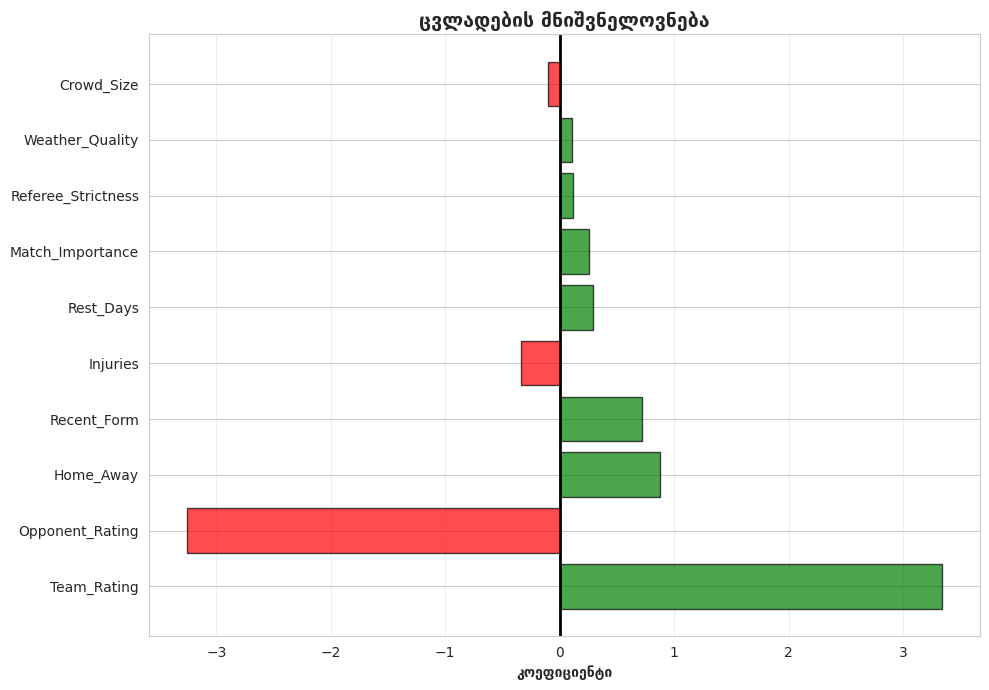

In [15]:
# დაასრულეთ კოდი

# ცვლადების მნიშვნელოვნება
print("\n" + "="*70)
print("ცვლადების მნიშვნელოვნება")
print("="*70)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\nცვლადების კოეფიციენტები:")
print(coefficients.to_string(index=False))

# ცვლადების მნიშვნელოვნების (Feature Importance) ვიზუალიზება
plt.figure(figsize=(10, 7))
colors = ['green' if x > 0 else 'red' for x in coefficients['Coefficient']]
plt.barh(coefficients['Feature'], coefficients['Coefficient'],
        color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('კოეფიციენტი', fontweight='bold')
plt.title('ცვლადების მნიშვნელოვნება', fontweight='bold', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', linewidth=2)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()

# ბიზნეს-ინსაითები და რეკომენდაციები
print("\n" + "="*70)
print("ბიზნეს-ინსაითები და რეკომენდაციები")
print("="*70)

print("""
ძირითადი მიგნებები:

1. მატჩის შედეგზე ყველაზე გავლენიანი ფაქტორები (აბსოლუტური კოეფიციენტებით):""")

for i, row in coefficients.iterrows():
    impact = "დადებითი" if row['Coefficient'] > 0 else "უარყოფითი"
    print(f"   • {row['Feature']}: {impact} გავლენა ({row['Coefficient']:.3f})")

print(f"""

2. პრაქტიკული რეკომენდაციები მოგების ალბათობის გასაზრდელად:

   ფოკუსირება საჭიროა:
      - **Team_Rating**: გუნდის რეიტინგის ამაღლება პირდაპირ კორელირებს მოგების ალბათობასთან. გრძელვადიანი განვითარება და მოთამაშეების გაძლიერება კრიტიკულია.
      - **Opponent_Rating**: მოწინააღმდეგის დაბალი რეიტინგი მნიშვნელოვნად ზრდის მოგების შანსს. თუმცა, ამ ფაქტორზე პირდაპირი გავლენა არ გვაქვს, შეგვიძლია მოვემზადოთ კონკრეტული მოწინააღმდეგისთვის.
      - **Home_Away**: სახლში თამაში უპირატესობაა. მაქსიმალურად უნდა გამოვიყენოთ საშინაო მატჩების უპირატესობა ტაქტიკურად და ფსიქოლოგიურად.
      - **Recent_Form**: კარგი ფორმა მნიშვნელოვნად ზრდის მოგების ალბათობას. ყურადღება უნდა გამახვილდეს გუნდის ფიზიკურ და ფსიქოლოგიურ მზადყოფნაზე, ტრენინგების ოპტიმიზაციაზე.

   სხვა ფაქტორები:
      - **Injuries**: დაზიანებული მოთამაშეების რაოდენობის შემცირება (უარყოფითი კოეფიციენტი). სამედიცინო შტაბმა უნდა იზრუნოს პრევენციაზე და სწრაფ რეაბილიტაციაზე.
      - **Rest_Days**: დასვენების დღეების რაოდენობას მცირედი დადებითი გავლენა აქვს. გრაფიკის დაგეგმვისას უნდა გავითვალისწინოთ საკმარისი დასვენება.
      - **Match_Importance, Weather_Quality, Referee_Strictness, Crowd_Size**: ამ ფაქტორებს მცირედი გავლენა აქვთ ან თითქმის არ აქვთ მნიშვნელობა მოდელში. მათზე ფოკუსირება ნაკლებად ეფექტური იქნება.

   მოკლევადიანი სტრატეგია:
      - საშინაო მატჩები და კარგი ფორმა.

   გრძელვადიანი სტრატეგია:
      - გუნდის რეიტინგის ამაღლება.
      - ტრავმების პრევენცია.

""")